In [ ]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from sklearn.neighbors import DistanceMetric
from math import radians
import re
from googletrans import Translator
import plotly.express as px

In [2]:
# Read the directory.csv file into a data frame
starbucks = pd.read_csv('directory.csv')
starbucks= starbucks[['store_name','City', 'State/Province','Country','Longitude', 'Latitude']]


#Create a new column for store count
starbucks['store_count'] = np.ones(starbucks.shape[0]).astype(int).tolist()
starbucks.sample(5)

#Read the country code file into the dateframe.
country_code = pd.read_csv('country_code.csv')
country_code

#Dataframe for the world population
world_population = pd.read_csv('world_population.csv')
world_population = world_population[['country', 'population']]
world_population.loc[world_population.country=='United States']

#DataFrame for the gdp
gdp=pd.read_csv('gdp.csv')

starbucks.sample(6)


,store_name,City,State/Province,Country,Longitude,Latitude,store_count
6540,Manado,Manado,SL,ID,124.83,1.46,1
23107,Randalls - Austin #2481,Austin,TX,US,-97.75,30.31,1
20540,Target - Albuquerque T-0357,Albuquerque,NM,US,-106.53,35.09,1
21796,Boardman Poland Road,Poland,OH,US,-80.63,41.02,1
764,Safeway - Abbotsford #88,Abbotsford,BC,CA,-122.32,49.05,1
25048,Hwy 12 & Old Hwy 99 SW,Rochester,WA,US,-123.01,46.80,1


In [3]:
#Merge the starbucks data frame and the country code
starbucks2= pd.merge(starbucks,country_code, left_on='Country', right_on='Two_Letter_Country_Code').drop('Two_Letter_Country_Code', axis=1)
starbucks2.sample(5)

,store_name,City,State/Province,Country,Longitude,Latitude,store_count,Continent_Name,Country_Name
14887,Fairway Creek & Five Star,Roseville,CA,US,-121.27,38.78,1,North America,United States of America
25706,Sprague & Pine,Spokane,WA,US,-117.24,47.66,1,North America,United States of America
8929,Mungyeong Saejae,Mungyeong-si,47,KR,128.08,36.76,1,Asia,"Korea, Republic of"
22974,Red Lion & Roosevelt,Philadelphia,PA,US,-75.02,40.10,1,North America,United States of America
7891,Hakata Hotel Centraza,Fukuoka,40,JP,130.40,33.59,1,Asia,Japan


In [4]:
#Modify the name of some countries, removing 'the, republic of'
country_name = starbucks2['Country_Name'].tolist()

country_name = [country.split(',')[0] for country in country_name]

#Assign the modified values in the country_name column
starbucks2['Country_Name'] = country_name


#Change united states of america to united states
starbucks2['Country_Name']= starbucks2['Country_Name'].apply(lambda x : 'United States' if x=='United States of America' else x)

#Change Russian Federation to Russia
starbucks2['Country_Name']= starbucks2['Country_Name'].apply(lambda x : 'Russia' if x=='Russian Federation' else x)


starbucks2['Country_Name']= starbucks2['Country_Name'].apply(lambda x : 'South Korea' if x=='Korea' else x)

#Change Russian Federation to Russia
starbucks2['Country_Name']= starbucks2['Country_Name'].apply(lambda x : 'Czech Republic' if x=='Czech Republic (Czechia)' else x)


# Change column names to lower case
starbucks2.columns = [x.lower()  for x in starbucks2.columns]
starbucks2.sample(5)


,store_name,city,state/province,country,longitude,latitude,store_count,continent_name,country_name
2879,平高国际广场店,上海市,31,CN,121.45,31.24,1,Asia,China
6440,Grand Metropolitan Mall,Bekasi,JW,ID,106.97,-6.25,1,Asia,Indonesia
20418,Ingles Dallas # 146,Dallas,NC,US,-81.18,35.32,1,North America,United States
16943,14795 S. Dixie Hwy.,Miami,FL,US,-80.34,25.63,1,North America,United States
2796,汇京国际广场店,上海市,31,CN,121.42,31.20,1,Asia,China


In [5]:
#Merge world population data with starbucks data 
starbucks3 = pd.merge(starbucks2, world_population, how='left', left_on='country_name', right_on='country')
starbucks3.drop('country_y', axis=1, inplace=True)

#Rename some columns
starbucks3.rename(columns={'country_x':'code', 'continent_name':'continent', 'country_name':'country'}, inplace=True)
starbucks3.sample(5)


,store_name,city,state/province,code,longitude,latitude,store_count,continent,country,population
22352,Fort Sill BX,Fort Sill,OK,US,-98.40,34.67,1,North America,United States,"331,002,651"
4112,佛山顺德乐从星光广场店,佛山市,44,CN,113.11,22.95,1,Asia,China,"1,439,323,776"
14175,Teavana - Beverly Center,Los Angeles,CA,US,-118.38,34.08,1,North America,United States,"331,002,651"
13539,Stevens Creek & DeAnza,Cupertino,CA,US,-122.03,37.32,1,North America,United States,"331,002,651"
24193,4th & Slide,Lubbock,TX,US,-101.92,33.59,1,North America,United States,"331,002,651"


In [6]:
#Merge gdp data with starbucks data 
starbucks4 = pd.merge(starbucks3, gdp, how='left', left_on='country', right_on='country')
starbucks4.drop('code_x', axis=1, inplace=True)
starbucks4.rename(columns={'code_y': 'code'}, inplace=True)
starbucks4.sample(5)


,store_name,city,state/province,longitude,latitude,store_count,continent,country,population,code,gdp_ppp
12635,"Alma School & Elliot Rd, Chandler",Chandler,AZ,-111.86,33.35,1,North America,United States,"331,002,651",USA,2.140000e+13
25672,Shoreline - 20121 Aurora Ave N,Shoreline,WA,-122.35,47.78,1,North America,United States,"331,002,651",USA,2.140000e+13
5180,La Vaguada,Madrid,MD,-3.70,40.47,1,Europe,Spain,"46,754,778",ESP,1.990000e+12
3515,宁波老外滩店,宁波市,33,121.56,29.88,1,Asia,China,"1,439,323,776",CHN,2.350000e+13
13718,Sierra Lakes & Citrus,Fontana,CA,-117.44,34.14,1,North America,United States,"331,002,651",USA,2.140000e+13


In [7]:
#Top 15 countries in terms of starbucks store count
df_bar= starbucks4[['country','store_count']].groupby('country').sum().sort_values( ascending=False, by='store_count').reset_index().head(15)



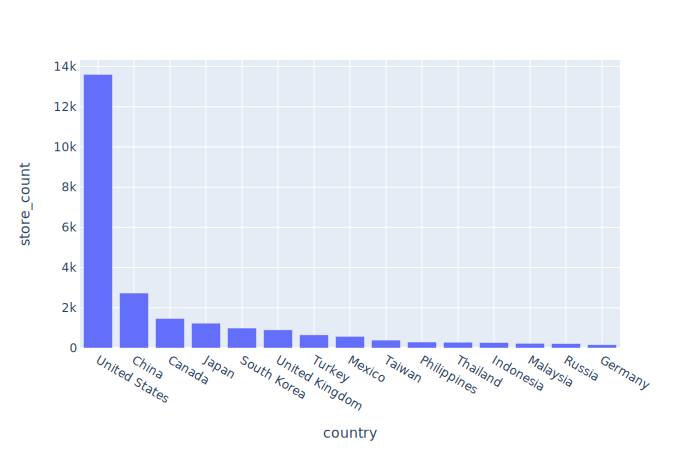

In [8]:
#Create a dataframe with the most starbucks store in the world
df_bar= starbucks4[['country','store_count']].groupby('country').sum().sort_values( ascending=False, by='store_count').reset_index().head(15)

#Display a bar graph
fig = px.bar(df_bar, x='country', y ='store_count')
fig.show("svg")

In [ ]:
# #Remove the comma in the population 78,100 -->78100
pop_df= starbucks4.copy()
pop_df.dropna(axis=0, inplace=True)
pop_df['population']= pop_df['population'].str.replace(',', '').astype(float)


In [ ]:
#Create a new data frame to include modified population values
df_scatter= pop_df.groupby(['country', 'population', 'continent', 'gdp_ppp']).agg({'store_count':'sum'}).reset_index()
df_scatter.sample(5)

In [ ]:
#Plot a scatter plot with population , gdp and store count
df = df_scatter
fig = px.scatter(df, x="population", y="gdp_ppp", size="store_count",color='continent',
           hover_name="country", log_x=True, size_max=50)
fig.show()



In [ ]:
#Create a new data frame without us, china and india
df_scatter2=df_scatter.loc[(df_scatter.country !='United States') & (df_scatter.country !='China') & (df_scatter.country !='India')]

#Graph the new dataframe
df = df_scatter2
fig = px.scatter(df, x="population", y="gdp_ppp", size="store_count",color='continent',
           hover_name="country", log_x=True, size_max=20)
fig.show('svg')



In [ ]:
city_df = starbucks3.loc[starbucks4.gdp_ppp>5e9]
city_df = city_df.dropna(axis=0)
city_df.set_index('city', inplace=True)
city_df.rename(index={'上海市':'Shanghai', '北京市':'Beijing','서울':'Seoul', '杭州市':'Hangzhou'}, inplace=True)
city_df.shape



In [ ]:
city_df.reset_index()
city_bar = city_df.groupby(['city', 'country', 'continent']).agg({'store_count':'sum'}).sort_values(by='store_count',ascending=False)
city_bar

In [ ]:
def avg_dist(df):
    
    """
    df: is a pandas dataframe

    Return the average distance of stores in miles
    """

    #Convert lat and lon degrees in radians
    df['latitude'] = np.radians(df['latitude'])
    df['longitude'] = np.radians(df['longitude'])

    #find the haversine distance
    dist = DistanceMetric.get_metric('haversine')

    #an array of distance of neighboring stores in miles
    array =dist.pairwise(df[['latitude','longitude']].to_numpy())*3798

    return np.mean(array[0])


In [ ]:
city1 =city_bar.reset_index().loc[:,['city','country']].to_numpy()


In [ ]:
city_df.reset_index()
city_list =[]
distance_list =[]

for ele in city1:
    city=ele[0]
    country= ele[1]
    
    city_2 =city_df.loc[(city_df.city==city) & (city_df.country==country)]
    distance = avg_dist(city2)
    
    city_list.append(city)
    distance_list.append(distance)
    


In [ ]:

distance_df =pd.DataFrame({'city': pd.Series(city_list), 'avg_dist':pd.Series(distance_list)})
distance_df
    